## 류현진 2021-07-19 경기 릴리스포인트

In [1]:
from pybaseball import statcast

In [2]:
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
playerid_lookup('ryu', 'hyun jin')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,ryu,hyun jin,547943,ryu-h001,ryuhy01,14444,2013.0,2021.0


In [3]:
ryu_stats = statcast_pitcher('2021-07-01', '2021-07-20', 547943)
ryu_stats.head(5)

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2021-07-18,86.7,2.23,5.82,"Ryu, Hyun Jin",621311,547943,field_out,hit_into_play,...,5,0,5,0,5,Standard,Standard,153,0.000,-0.120
1,FF,2021-07-18,91.0,2.07,5.73,"Ryu, Hyun Jin",621311,547943,NaN,ball,...,5,0,5,0,5,Standard,Standard,130,0.000,0.016
2,FF,2021-07-18,90.9,2.16,5.77,"Ryu, Hyun Jin",642201,547943,field_out,hit_into_play,...,5,0,5,0,5,Standard,Standard,131,0.002,-0.099
3,CH,2021-07-18,82.7,2.36,5.75,"Ryu, Hyun Jin",642201,547943,NaN,foul,...,5,0,5,0,5,Standard,Standard,116,0.000,-0.034
4,FC,2021-07-18,86.9,2.22,5.90,"Ryu, Hyun Jin",642201,547943,NaN,foul,...,5,0,5,0,5,Standard,Standard,148,0.000,-0.027


In [4]:
ryu_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [5]:
result=ryu_stats[['pitch_type','game_date','release_speed','release_pos_x','release_pos_z','release_spin_rate','release_extension','spin_axis']]

In [6]:
import pandas as pd

In [7]:
pd.DataFrame(result)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,release_spin_rate,release_extension,spin_axis
0,FC,2021-07-18,86.7,2.23,5.82,2096,6.4,153
1,FF,2021-07-18,91.0,2.07,5.73,2066,6.4,130
2,FF,2021-07-18,90.9,2.16,5.77,1940,6.4,131
3,CH,2021-07-18,82.7,2.36,5.75,1545,6.4,116
4,FC,2021-07-18,86.9,2.22,5.90,1992,6.3,148
...,...,...,...,...,...,...,...,...
249,CH,2021-07-01,80.8,2.60,5.84,1707,6.4,116
250,FC,2021-07-01,85.9,2.45,5.98,2005,6.4,139
251,CU,2021-07-01,73.7,2.46,6.13,2458,6.1,322
252,CU,2021-07-01,73.6,2.17,6.23,2500,5.9,322


In [8]:
import numpy as np
df=result.groupby(['game_date','pitch_type']).agg({'release_speed':np.mean,'pitch_type':np.size,'release_pos_x':np.mean,'release_pos_z':np.mean,'release_spin_rate':np.mean,'release_extension':np.mean,'spin_axis':np.mean})
df.round(2)

release_speed  pitch_type  release_pos_x  \
game_date  pitch_type                                             
2021-07-01 CH                  80.06          12           2.42   
           CU                  74.16           9           2.17   
           FC                  85.38          24           2.30   
           FF                  90.00          40           2.18   
2021-07-07 CH                  81.21          18           2.38   
           CU                  73.77           8           2.09   
           FC                  86.31          16           2.29   
           FF                  90.54          42           2.22   
           SI                  83.95           2           2.48   
2021-07-18 CH                  82.95          24           2.30   
           CU                  74.75           6           2.04   
           FC                  87.25          23           2.20   
           FF                  90.84          30           2.13   

                       release_pos_z  release_spin_rate  release_extension  \
game_date  pitch_type                                                        
2021-07-01 CH                   5.75            1572.25               6.50   
           CU                   6.09            2481.22               6.18   
           FC                   5.86            2011.71               6.38   
           FF                   5.84            2011.72               6.43   
2021-07-07 CH                   5.83            1540.89               6.69   
           CU                   6.08            2492.88               6.52   
           FC                   5.89            2028.88               6.51   
           FF                   5.90            1927.52               6.64   
           SI                   5.69            1656.00               6.80   
2021-07-18 CH                   5.73            1569.62               6.45   
           CU                   6.03            2501.50               6.12   
           FC                   5.86            1982.61               6.29   
           FF                   5.85            1944.30               6.36   

                       spin_axis  
game_date  pitch_type             
2021-07-01 CH             118.33  
           CU             322.11  
           FC             149.08  
           FF             133.80  
2021-07-07 CH             119.50  
           CU             321.75  
           FC             182.19  
           FF             135.90  
           SI             116.50  
2021-07-18 CH             115.21  
           CU             319.50  
           FC             151.39  
           FF             132.07

In [9]:
loc1=result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-18')]
loc2=result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-18')]
loc3=result[(result['pitch_type']=='CU') & (result['game_date']=='2021-07-18')]
loc4=result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-18')]

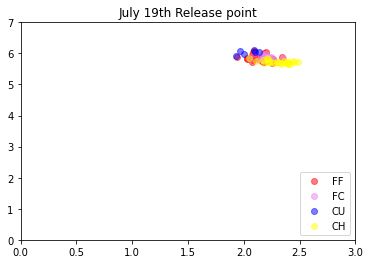

In [10]:
import matplotlib.pyplot as plt

plt.scatter(loc1.release_pos_x,loc1.release_pos_z,color='red',alpha=0.5)
plt.scatter(loc2.release_pos_x,loc2.release_pos_z,color='violet',alpha=0.5)
plt.scatter(loc3.release_pos_x,loc3.release_pos_z,color='blue',alpha=0.5)
plt.scatter(loc4.release_pos_x,loc4.release_pos_z,color='yellow',alpha=0.5)
plt.axis([0, 3, 0, 7])
plt.legend(['FF','FC','CU','CH'],loc=4)
plt.title('July 19th Release point')

plt.savefig('pitchs')
plt.show()


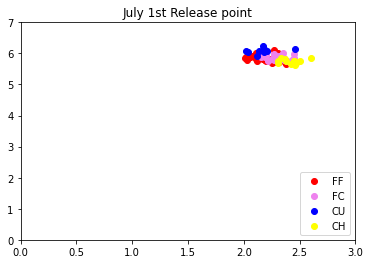

In [11]:
loc1=result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-01')]
loc2=result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-01')]
loc3=result[(result['pitch_type']=='CU') & (result['game_date']=='2021-07-01')]
loc4=result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-01')]

plt.scatter(loc1.release_pos_x,loc1.release_pos_z,color='red')
plt.scatter(loc2.release_pos_x,loc2.release_pos_z,color='violet')
plt.scatter(loc3.release_pos_x,loc3.release_pos_z,color='blue')
plt.scatter(loc4.release_pos_x,loc4.release_pos_z,color='yellow')
plt.axis([0, 3, 0, 7])
plt.legend(['FF','FC','CU','CH'],loc=4)
plt.title('July 1st Release point')

plt.savefig('pitchs1')
plt.show()

## 투구 위치

In [12]:
target=ryu_stats[['game_date','pitch_type','plate_x', 'plate_z']]

In [13]:
target_FF=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='FF')]
target_FC=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='FC')]
target_CH=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='CH')]
target_CU=target[(target['game_date']=='2021-07-18') & (target['pitch_type']=='CU')]

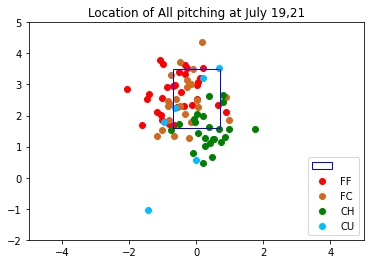

In [14]:
fig,ax = plt.subplots()
plt.scatter(target_FF.plate_x,target_FF.plate_z,color='red')
plt.scatter(target_FC.plate_x,target_FC.plate_z,color='chocolate')
plt.scatter(target_CH.plate_x,target_CH.plate_z,color='green')
plt.scatter(target_CU.plate_x,target_CU.plate_z,color='deepskyblue')
import matplotlib.patches as patches
ax.add_patch(
    patches.Rectangle((-0.7, 1.6),1.4,1.9,edgecolor = 'blue',fill=False)
)
plt.legend(['','FF','FC','CH','CU'],loc=4)
plt.axis([-5, 5, -2, 5])
plt.title('Location of All pitching at July 19,21')
plt.show()

## 3D 모션

In [15]:
result=ryu_stats[['game_date','pitch_type','release_pos_x','release_pos_y', 'release_pos_z']]

In [16]:
loc1=result[(result['pitch_type']=='FF') & (result['game_date']=='2021-07-18')]
loc2=result[(result['pitch_type']=='FC') & (result['game_date']=='2021-07-18')]
loc3=result[(result['pitch_type']=='CH') & (result['game_date']=='2021-07-18')]
loc4=result[(result['pitch_type']=='CU') & (result['game_date']=='2021-07-18')]

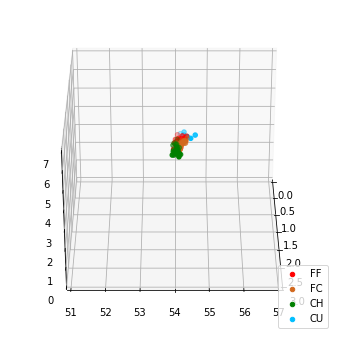

In [20]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(loc1.release_pos_x,loc1.release_pos_y,loc1.release_pos_z,color='red')
ax.scatter(loc2.release_pos_x,loc2.release_pos_y,loc2.release_pos_z,color='chocolate')
ax.scatter(loc3.release_pos_x,loc3.release_pos_y,loc3.release_pos_z,color='green')
ax.scatter(loc4.release_pos_x,loc4.release_pos_y,loc4.release_pos_z,color='deepskyblue')

ax.legend(['FF','FC','CH','CU'],loc=4)
ax.set_xlim(0,3)
ax.set_ylim(51,57)
ax.set_zlim(0,7)

ax.view_init(30,0)
plt.show()

## 직구 회전축과 회전수의 관계

In [21]:
from pybaseball import statcast
data = statcast(start_dt='2021-04-01', end_dt='2021-07-22')
data.head(2)



This is a large query, it may take a moment to complete


C:\Users\SEC\anaconda3\lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|████████████████████████████████████████████████████████████████████████████████| 113/113 [03:36<00:00,  1.91s/it]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1927,SL,2021-07-20,89.1,-1.8,5.7,"Hendriks, Liam",518626,521230,field_out,hit_into_play,...,9,5,9,5,9,Strategic,Standard,117,0.003,-0.149
2030,FF,2021-07-20,99.5,-1.68,5.77,"Hendriks, Liam",518626,521230,NaN,foul,...,9,5,9,5,9,Strategic,Standard,203,0.0,0.0


In [22]:
data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [35]:
fastball=data[data['pitch_type']=='FF'][['release_speed','release_spin_rate','spin_axis']]

In [37]:
fastball.isnull().sum()

release_speed          4
release_spin_rate    597
spin_axis            592
dtype: int64

In [39]:
fastball.dropna(axis=0,inplace=True)
fastball.isnull().sum()

release_speed        0
release_spin_rate    0
spin_axis            0
dtype: int64

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y=fastball[['release_speed']]
x=fastball[['release_spin_rate','spin_axis']]
scaler=MinMaxScaler()
scaler.fit(x)
x=scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [58]:
regressor = LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
regressor.score(x_test,y_test)

C:\Users\SEC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.1020896075589669

In [46]:
fastball.head()

,release_speed,release_spin_rate,spin_axis
2030,99.5,2541,203
2052,99.3,2520,200
2128,99.1,2466,200
2245,99.3,2491,204
2346,99.0,2458,200
